# Ch. 2 exercises

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

## Exercise 2-1
Write your own code to reproduce figure 2.2 from the book.

In [64]:
v = np.array([1,2])
w = np.array([4,-6])
vPlusW = v+w
vMinusW = v - w

print(v)
print(w)
print(vPlusW)
print(vMinusW)

[1 2]
[ 4 -6]
[ 5 -4]
[-3  8]


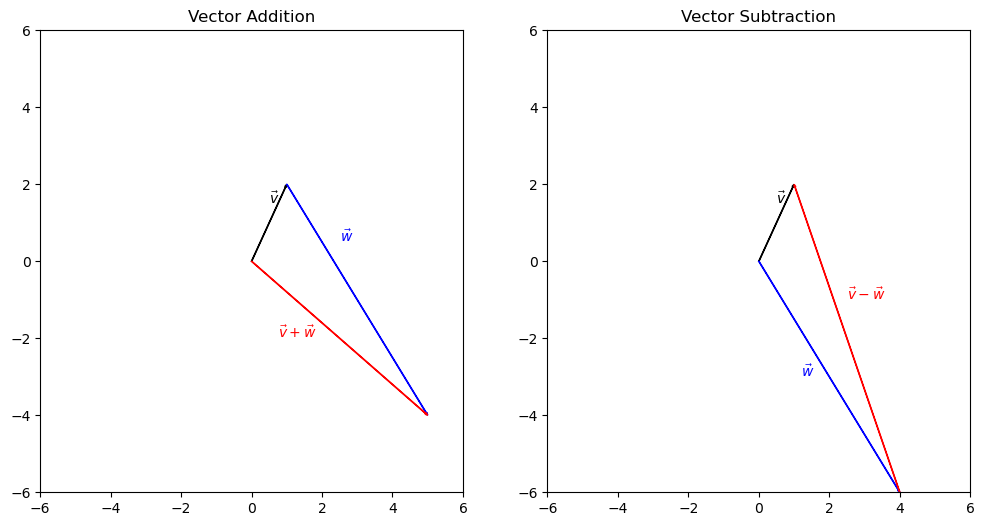

In [76]:
fig, axs = plt.subplots(1, 2, figsize = (12,6))

axs[0].arrow(0, 0, v[0], v[1], head_width=.05,width=.01,color='k',length_includes_head=True)
axs[0].arrow(v[0], v[1], w[0], w[1], head_width=.05,width=.01,color='b',length_includes_head=True)
axs[0].arrow(0, 0, vPlusW[0], vPlusW[1], head_width=.05,width=.01,color='r',length_includes_head=True)
axs[0].text(0.5, 1.5, r'$\vec{v}$', color = 'k')
axs[0].text(2.5, 0.5, r'$\vec{w}$', color = 'b')
axs[0].text(.75, -2, r'$\vec{v} + \vec{w}$' , color = 'r')
axs[1].arrow(0, 0, v[0], v[1], head_width=.05,width=.01,color='k',length_includes_head=True)
axs[1].arrow(0,0, w[0], w[1], head_width=.05,width=.01,color='b',length_includes_head=True)
axs[1].arrow(w[0], w[1], vMinusW[0], vMinusW[1], head_width=.05,width=.01,color='r',length_includes_head=True)
axs[1].text(0.5, 1.5, r'$\vec{v}$', color = 'k')
axs[1].text(1.2, -3, r'$\vec{w}$', color = 'b')
axs[1].text(2.5, -1, r'$\vec{v} - \vec{w}$' , color = 'r')
axs[0].set_title('Vector Addition')
axs[1].set_title('Vector Subtraction')
axs[0].set_xlim(-6,6)
axs[0].set_ylim(-6,6)
axs[1].set_xlim(-6,6)
axs[1].set_ylim(-6,6)
plt.show()

## Exercise 2-2
Write an algorithm to compute the norm of a vector by translating Equation 2-7 inoto code. Confirm, using random vectors with different dimensionalities and orientations, that you get the same result as `np.linalg.norm()`.

Equation 2-7:  
$$\|\vec{v}\|_2 = \sqrt{\sum_{i=1}^{n} v_i^2}$$

In [182]:
def calculate_norm(vector):
    # for each element in a vector
    sum = 0
    if len(vector.shape) == 1:
        for v in vector:
        # square that element and add it to the sum
            sum += v**2
    # norm is the square root of the sum
        norm = sum ** (1/2)
        return norm
    elif len(vector.shape) == 2:
        if vector.shape[0] == 1:
            for v in vector[0]:
                sum += v ** 2
            norm = sum ** (1/2)
            return norm
        elif vector.shape[1] == 1:
            for v in vector:
                sum += v[0] ** 2
            norm = sum ** (1/2)
            return norm
        else:
            return "Input is not a valid shape"
    else:
        return "Input is not a valid shape"

In [190]:
random_vector = np.random.randn(5,1)
calculated_norm = calculate_norm(random_vector)
np_norm = np.linalg.norm(random_vector)
print(calculated_norm)
print(np_norm)

1.4549041013121276
1.4549041013121276


In [191]:
# book solution
def normOfVect(v):
  return np.sqrt(np.sum(v**2))
# lol

## Exercise 2-3
Create a Python function that will take a vector as input and output a unit vector in the same direction. What happens when you input the zeros vector?


$$\hat{v} =\frac{1}{\|\vec{v}\|_2}\vec{v} = \frac{\vec{v}}{\|\vec{v}\|_2}$$

In [192]:
def create_unit_vector(vector):
    return vector / np.linalg.norm(vector)

In [195]:
create_unit_vector(random_vector)

array([[ 0.05673448],
       [ 0.3897752 ],
       [-0.59428713],
       [ 0.70033476],
       [-0.03479248]])

In [ ]:
create_unit_vector(np.zeros(5)) # not a number b/c the zeros vector doesn't have a magnitude

C:\Users\schcb\AppData\Local\Temp\ipykernel_26464\16538145.py:2: RuntimeWarning: invalid value encountered in divide
  return vector / np.linalg.norm(vector)


array([nan, nan, nan, nan, nan])

## Exercise 2-4
Write a Python function that will take a vector and a desired magnitude as inputs and will return a vector in the same direction but with a magnitude corresponding to the second input.

In [197]:
def create_magnitude_vector(vector, magnitude):
    unit_vector = vector / np.linalg.norm(vector)
    return unit_vector * magnitude

In [198]:
w = np.array([1,0,0])
mw = create_magnitude_vector(w,4)
print( mw )

# confirm the vectors' norms
print( np.linalg.norm(w),np.linalg.norm(mw) )

[4. 0. 0.]
1.0 4.0


## Exercise 2-5
Write a for loop to transpose a row vector into a column vector without using a built-in function or method such as `np.transpose()` or `v.T`.

In [19]:
row_vec = np.random.randn(1,5)
col_vec = np.zeros((5,1))
print(row_vec)
for i in range(row_vec.shape[1]):
    col_vec[i, 0] = row_vec[0, i]

print(col_vec)
np.transpose(row_vec) == col_vec

[[ 0.74440106 -0.10383924 -0.36264578  3.12202081  0.09511907]]
[[ 0.74440106]
 [-0.10383924]
 [-0.36264578]
 [ 3.12202081]
 [ 0.09511907]]


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Exercise 2-6
Here is an interesting fact: you can comopute the squared norm of a vector as the dot product of that vector with itself. Look back to Equation 2-7 to convice yourself of this equivalence, then confirm using Python.

Squared norm of a vector
$$\|\vec{v}\|^2 = \sum_{i=1}^{n} v_i^2$$


Equation 2-9 (Dot Product formula)
$$\delta = \sum_{i=1}^{n}a_ib_i$$

If $\vec{a} = \vec{b}$,
$$\delta = \sum_{i=1}^{n}v_iv_i = \sum_{i=1}^{n}v_i^2 = \|\vec{v}\|^2 $$

In [21]:
c = np.random.randn(5)
print(np.linalg.norm(c)**2)
print(np.dot(c,c))

0.24467944655524476
0.24467944655524476


## Exercise 2-7
Write code to demonstrate that the dot product is *commutative*.

In [24]:
a = np.random.randn(5,1)
b = np.random.randn(5,1)

print('dot product of aT * b:', np.sum(a*b))
print('dot product of bT * a:', np.sum(b*a))

dot product of aT * b: -0.9170087400368999
dot product of bT * a: -0.9170087400368999


## Exercise 2-8
Write code to produce Figure 2-6.

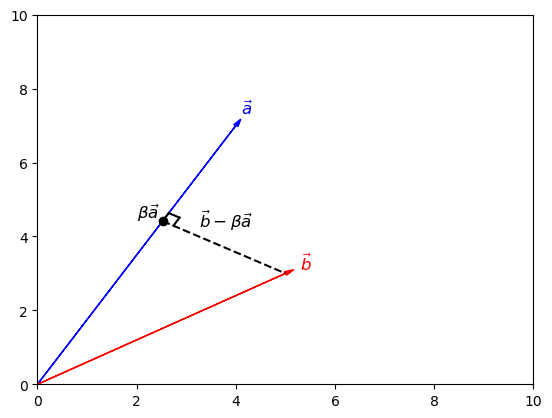

In [28]:
# Ignore this code on your first read through, it exists to set up variables for the graph we will construct
a = np.array([4, 7])
v = np.array([5, 3]) - 0.63076923 * a   # b - βa

a_hat = a / np.linalg.norm(a)
v_hat = v / np.linalg.norm(v)

s = 0.25

P = np.array([2.52307692, 4.41538462])

p1 = P + s * a_hat
p2 = p1 + s * v_hat
p3 = P + s * v_hat

# Create a figure and axes
fig, ax = plt.subplots()

# Plot an arrow starting at (1, 1) and ending at (3, 4)
# x=1, y=1 (start point)
# dx=2, dy=3 (length/direction: 3-1=2, 4-1=3)
ax.arrow(0,0,4,7, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
ax.arrow(0,0,5,3, head_width=0.1, head_length=0.2, fc='red', ec='red')
ax.text(4.1, 7.3, r'$\vec{a}$', color='blue', fontsize=12)
ax.text(5.3, 3.1, r'$\vec{b}$', color='red', fontsize=12)
ax.plot([2.52307692,5], [4.41538462,3], color = 'black', linestyle = '--')
ax.text(3.25,4.25, r'$\vec{b}-\beta\vec{a}$',color = 'black', fontsize = 12)
ax.plot(2.52307692, 4.41538462, 'ko')
ax.text(2, 4.5, r'$\beta\vec{a}$', color = 'black', fontsize = 12)
ax.plot([P[0], p1[0]], [P[1], p1[1]], color='black')
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black')
ax.plot([p2[0], p3[0]], [p2[1], p3[1]], color='black')

# Set limits and labels for clarity
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

## Exercise 2-9
Implement orthogonal vector decomposition. Start with two random-number vectors **t** and **r** and reproduce Figure 2-8 (note that your plot will look somewhat different due to random numbers). Next confirm taht the two components sum to **t** and that $\vec{t_{\parallel r}}$ and $\vec{t_{\perp r}}$ are orthogonal.

In [52]:
t = np.random.randn(2)
r = np.random.randn(2)
t_para = r * (np.dot(t,r) / np.dot(r,r))
t_perp = t - t_para
np.dot(t_para, t_perp)


-4.85722573273506e-17

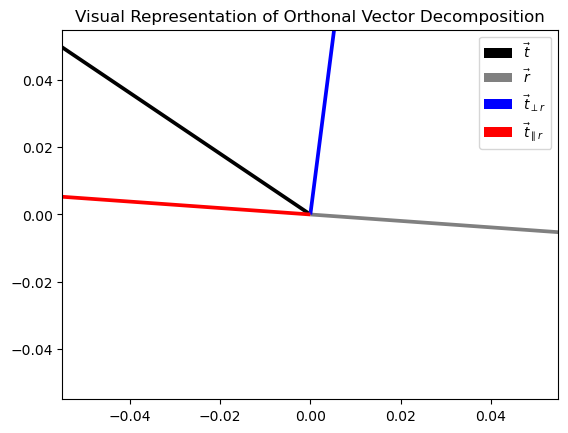

In [55]:
# Create a figure and axes
fig, ax = plt.subplots()

# elements of plot

ax.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color='black', label=r'$\vec{t}$')
ax.quiver(0, 0, r[0], r[1], angles='xy', scale_units='xy', scale=1, color='grey', label=r'$\vec{r}$')
ax.quiver(0, 0, t_perp[0], t_perp[1], angles='xy', scale_units='xy', scale=1, color='blue', label=r'$\vec{t}_{\perp r}$')
ax.quiver(0, 0, t_para[0], t_para[1], angles='xy', scale_units='xy', scale=1, color='red', label=r'$\vec{t}_{\parallel r}$')

ax.legend()

plt.title('Visual Representation of Orthonal Vector Decomposition')
#ax.text(2, 4.5, r'Goal: Given, $\vec{t}$ and $\vec{r}$, find $\vec{t_{\perp r}}$ and  $\vec{t_{\parallel r}}$')
plt.show()

## Exercise 2-10
Let's say there is a bug in your code such that denominator in the projection scalar of Equation 2-13 is $\vec{t}^T\vec{t}$ instead of $\vec{r}^T\vec{r}$. Implement this bug to check whether it really deviates from the accurate code. What can you do to check whether the result is correct or incorrect?

$$ \vec{t_{\parallel r}} = \vec{r}\frac{\vec{t}^T\vec{r}}{\vec{r}^T\vec{r}}$$

In [60]:
t = np.random.randn(2)
r = np.random.randn(2)
t_para = r * (np.dot(t,r) / np.dot(t,t)) # implementing the incorrect denominator
t_perp = t - t_para
np.dot(t_para, t_perp) # to check, confirm that the dot product between para and perp is 0

-1.1728930043113988